In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [2]:
movie_df = pd.read_csv(r'data/data_regression.csv')

In [3]:
movie_df.columns

Index(['imdb_id', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Romance', 'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy',
       'Family_Animation', 'Action_Adventure', 'History_War', 'Others',
       'director_rank', 'actor1_rank', 'actor2_rank', 'actor3_rank',
       'gross_budget_ratio'],
      dtype='object')

# 1) Only Ranks

In [4]:
classification_df = movie_df.drop(columns=['imdb_id', 'director_name', 'num_critic_for_reviews',
       'actor_2_name',
       'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users',
       'actor_3_name', 'plot_keywords',
       'num_user_for_reviews',
       'title_year', 'imdb_score',
       'movie_facebook_likes','director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes'])

In [5]:
classification_df

,duration,cast_total_facebook_likes,facenumber_in_poster,language,country,content_rating,budget,Biography,Comedy,Crime,...,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,gross_budget_ratio
0,123.0,22209,1.0,English,USA,PG-13,48000000.0,0,1,0,...,1,0,0,0,0,8,6,3,4,0.981155
1,88.0,2726,0.0,English,USA,PG,3500000.0,0,1,0,...,0,0,0,0,0,8,2,3,4,23.828571
2,104.0,1662,0.0,English,USA,R,4500000.0,0,0,0,...,0,0,1,0,0,7,3,3,3,13.078468
3,148.0,2566,1.0,English,USA,R,27000000.0,0,1,1,...,0,0,1,0,1,8,3,3,4,2.007407
4,98.0,14921,3.0,English,USA,R,6000000.0,0,1,0,...,0,0,0,0,1,7,7,3,5,6.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,92.0,17860,0.0,English,USA,R,35000000.0,0,1,0,...,0,0,0,0,0,7,5,3,4,1.579766
3848,100.0,18786,9.0,English,USA,R,20000000.0,0,1,0,...,0,0,0,0,0,7,5,5,5,2.773065
3849,92.0,2848,4.0,English,USA,R,5000000.0,0,1,0,...,0,0,0,0,0,5,2,4,4,2.335036
3850,81.0,3344,0.0,English,USA,PG-13,4900000.0,0,0,0,...,0,0,0,0,0,7,3,3,4,11.537962


## 1.1) All Movies

In [6]:
classification1_df=classification_df.drop(columns=['country','language'])
df1 = pd.get_dummies(classification1_df, columns=['content_rating'])
df1 = df1.drop(columns =['content_rating_Not Rated','content_rating_G','content_rating_X','content_rating_NC-17'])
Q1 = df1['gross_budget_ratio'].quantile(0.25)
Q3 = df1['gross_budget_ratio'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filtering = (df1['gross_budget_ratio'] >= Q1 - 1.5 * IQR) & (df1['gross_budget_ratio'] <= Q3 + 1.5 *IQR)
df1=df1.loc[filtering] 
df1

,duration,cast_total_facebook_likes,facenumber_in_poster,budget,Biography,Comedy,Crime,Drama,Romance,Mystery_Thriller_Horror,...,History_War,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,gross_budget_ratio,content_rating_PG,content_rating_PG-13,content_rating_R
0,123.0,22209,1.0,4.800000e+07,0,1,0,0,1,0,...,0,0,8,6,3,4,0.981155,0,1,0
3,148.0,2566,1.0,2.700000e+07,0,1,1,0,0,0,...,0,1,8,3,3,4,2.007407,0,0,1
5,124.0,1462,0.0,2.000000e+07,1,1,0,0,0,0,...,0,1,5,3,2,3,0.100000,1,0,0
6,124.0,2667,0.0,5.166449e+07,1,0,0,1,0,0,...,0,1,7,3,4,4,1.546517,1,0,0
11,325.0,14255,0.0,4.400000e+07,0,0,0,1,0,0,...,0,1,7,6,3,5,0.034091,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,121.0,6617,0.0,5.000000e+06,0,0,0,1,0,0,...,0,0,7,4,3,4,0.940072,0,1,0
3847,92.0,17860,0.0,3.500000e+07,0,1,0,0,0,0,...,0,0,7,5,3,4,1.579766,0,0,1
3848,100.0,18786,9.0,2.000000e+07,0,1,0,0,0,0,...,0,0,7,5,5,5,2.773065,0,0,1
3849,92.0,2848,4.0,5.000000e+06,0,1,0,0,0,0,...,0,0,5,2,4,4,2.335036,0,0,1


## 1.1.1) Without log and feature elimination

In [7]:
X = df1.drop(columns=['gross_budget_ratio'])
y = df1['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2459, 22)
Dimensionality of X_test : (1054, 22)
Dimensionality of y_train: (2459,)
Dimensionality of y_test : (1054,)


### 1.1.1.1) Ridge Regression

In [8]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [9]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = Ridge()
clf1 = GridSearchCV(ridge, parameters, scoring ='neg_mean_squared_error')
clf1.fit(X_train_scaled, y_train)

y_pred = clf1.predict(X_test_scaled)

print("ridge best parameters:", clf1.best_params_)
print("ridge score:", clf1.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, clf1.predict(X_test_scaled)))
print("ridge best estimator coef:", clf1.best_estimator_.coef_)

ridge best parameters: {'alpha': 0.7000000000000001}
ridge score: -1.000691815138393
ridge MSE: 1.000691815138393
ridge best estimator coef: [ 0.21364061  0.47761464  0.38558612 -1.56285716 -0.101597    0.03765624
 -0.12637671 -0.18379425 -0.05568325 -0.0044267  -0.16731913  0.21562961
 -0.17299776 -0.29481343 -0.08413297  0.60598504  0.05694803  0.19864528
  0.34339433  0.3268268   0.37245507  0.21616806]


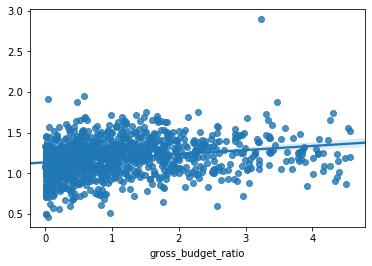

In [10]:
sns.regplot(y_test, y_pred )

### 1.1.1.2) Lasso Regression

In [11]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
Lasso = linear_model.Lasso()
clf2 = GridSearchCV(Lasso, parameters, scoring ='neg_mean_squared_error')
clf2.fit(X_train_scaled, y_train)

y_pred = clf2.predict(X_test_scaled)

print("Lasso best parameters:", clf2.best_params_)
print("Lasso score:", clf2.score(X_test_scaled, y_test))
print("Lasso MSE:", mean_squared_error(y_test, clf2.predict(X_test_scaled)))
print("Lasso best estimator coef:", clf2.best_estimator_.coef_)

Lasso best parameters: {'alpha': 0.1}
Lasso score: -1.0544373009111565
Lasso MSE: 1.0544373009111565
Lasso best estimator coef: [-0.  0.  0. -0. -0.  0. -0. -0.  0. -0. -0.  0. -0. -0. -0.  0.  0.  0.
  0.  0.  0. -0.]


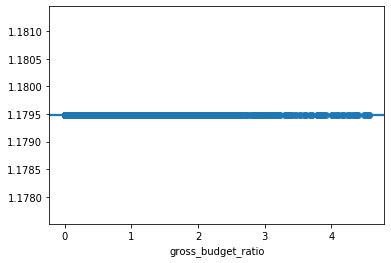

In [12]:
sns.regplot(y_test, y_pred )

### 1.1.1.3) Decision Tree Regressor

In [13]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTR = DecisionTreeRegressor(random_state=10)
clf3 = GridSearchCV(DTR, parameters, scoring ='neg_mean_squared_error')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

print("DTR best parameters:", clf3.best_params_)
print("DTR score:", clf3.score(X_test, y_test))
print("DTR MSE:", mean_squared_error(y_test, clf3.predict(X_test)))

DTR best parameters: {'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 0.005, 'min_samples_split': 0.05}
DTR score: -1.0395962212779242
DTR MSE: 1.0395962212779242


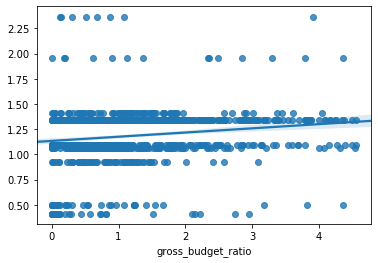

In [14]:
sns.regplot(y_test, y_pred )

### 1.1.1.4) Random Forest Regressor

In [15]:
RFEstimatorList = [25,50,100,200]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFR = RandomForestRegressor(random_state=10)
clf4 = GridSearchCV(RFR, parameters, cv=5, verbose=0,scoring ='neg_mean_squared_error')
clf4.fit(X_train, y_train)

y_pred = clf4.predict(X_test)

print("RFR best parameters:", clf4.best_params_)
print("RFR score:", clf4.score(X_test, y_test))
print("RFR MSE:", mean_squared_error(y_test, clf4.predict(X_test)))

RFR best parameters: {'criterion': 'mse', 'max_depth': 10, 'n_estimators': 200}
RFR score: -1.0009767690215752
RFR MSE: 1.0009767690215752


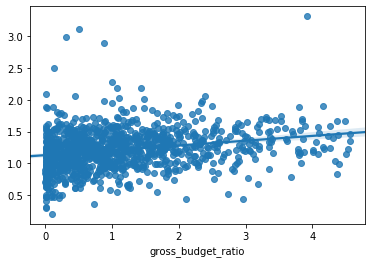

In [16]:
sns.regplot(y_test, y_pred )

## 1.1.2) With taking log and feature elimination

### log

In [17]:
df2 = df1.copy()
df2['budget'] = np.log(df2['budget'])
df2['cast_total_facebook_likes'] = df2['cast_total_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))

### elimination

In [18]:
df2.columns

Index(['duration', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'budget', 'Biography', 'Comedy', 'Crime', 'Drama', 'Romance',
       'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy', 'Family_Animation',
       'Action_Adventure', 'History_War', 'Others', 'director_rank',
       'actor1_rank', 'actor2_rank', 'actor3_rank', 'gross_budget_ratio',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_R'],
      dtype='object')

In [19]:
df2 = df2.drop(columns = ['facenumber_in_poster', 'Biography', 'Crime',
       'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy',
       'History_War'])

In [20]:
X = df2.drop(columns=['gross_budget_ratio'])
y = df2['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2459, 16)
Dimensionality of X_test : (1054, 16)
Dimensionality of y_train: (2459,)
Dimensionality of y_test : (1054,)


### 1.1.2.1) Ridge Regression

In [21]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [22]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = Ridge()
clf1 = GridSearchCV(ridge, parameters, scoring ='neg_mean_squared_error')
clf1.fit(X_train_scaled, y_train)

y_pred = clf1.predict(X_test_scaled)

print("ridge best parameters:", clf1.best_params_)
print("ridge score:", clf1.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, clf1.predict(X_test_scaled)))
print("ridge best estimator coef:", clf1.best_estimator_.coef_)

ridge best parameters: {'alpha': 0.30000000000000004}
ridge score: -0.9911650669974112
ridge MSE: 0.9911650669974112
ridge best estimator coef: [ 0.80087938  1.6182813  -1.95404705  0.09300685 -0.22459369 -0.02546104
  0.31582826 -0.10564091 -0.05668853  0.69294682 -0.3516689  -0.00305098
  0.19417781  0.34889375  0.46784189  0.23524396]


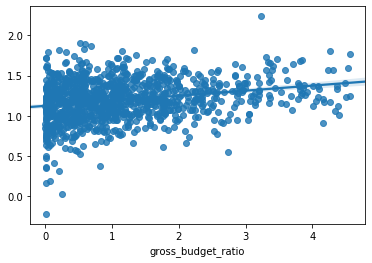

In [23]:
sns.regplot(y_test, y_pred )

### 1.1.2.2) Lasso Regression

In [24]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
Lasso = linear_model.Lasso()
clf2 = GridSearchCV(Lasso, parameters, scoring ='neg_mean_squared_error')
clf2.fit(X_train_scaled, y_train)

y_pred = clf2.predict(X_test_scaled)

print("Lasso best parameters:", clf2.best_params_)
print("Lasso score:", clf2.score(X_test_scaled, y_test))
print("Lasso MSE:", mean_squared_error(y_test, clf2.predict(X_test_scaled)))
print("Lasso best estimator coef:", clf2.best_estimator_.coef_)

Lasso best parameters: {'alpha': 0.1}
Lasso score: -1.0544373009111565
Lasso MSE: 1.0544373009111565
Lasso best estimator coef: [-0.  0. -0.  0. -0.  0.  0. -0. -0.  0.  0.  0.  0.  0.  0. -0.]


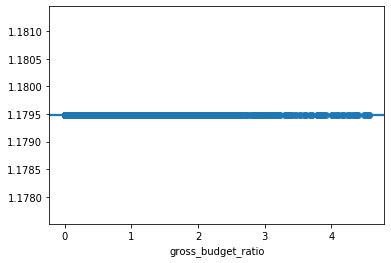

In [25]:
sns.regplot(y_test, y_pred )

### 1.1.2.3) Decision Tree Regressor

In [26]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTR = DecisionTreeRegressor(random_state=10)
clf3 = GridSearchCV(DTR, parameters, scoring ='neg_mean_squared_error')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

print("DTR best parameters:", clf3.best_params_)
print("DTR score:", clf3.score(X_test, y_test))
print("DTR MSE:", mean_squared_error(y_test, clf3.predict(X_test)))

DTR best parameters: {'criterion': 'mse', 'max_depth': 7, 'min_samples_leaf': 0.005, 'min_samples_split': 0.1}
DTR score: -1.0304592281149516
DTR MSE: 1.0304592281149516


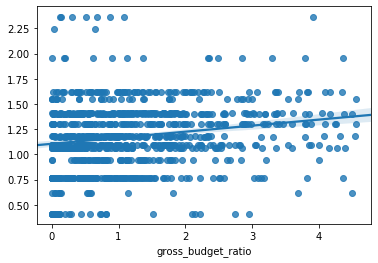

In [27]:
sns.regplot(y_test, y_pred )

### 1.1.2.4) Random Forest Regressor

In [28]:
RFEstimatorList = [25,50,100,200]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFR = RandomForestRegressor(random_state=10)
clf4 = GridSearchCV(RFR, parameters, cv=5, verbose=0,scoring ='neg_mean_squared_error')
clf4.fit(X_train, y_train)

y_pred = clf4.predict(X_test)

print("RFR best parameters:", clf4.best_params_)
print("RFR score:", clf4.score(X_test, y_test))
print("RFR MSE:", mean_squared_error(y_test, clf4.predict(X_test)))

RFR best parameters: {'criterion': 'mse', 'max_depth': 10, 'n_estimators': 200}
RFR score: -1.0022291901344804
RFR MSE: 1.0022291901344804


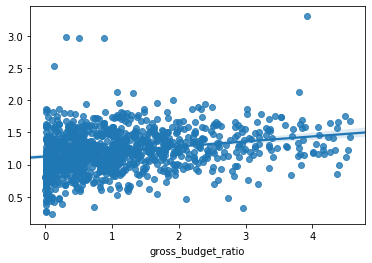

In [29]:
sns.regplot(y_test, y_pred )

## 1.2) Only US and UK Movies

In [30]:
classification2_df= classification_df.copy()
classification2_df = classification2_df[(classification2_df.country=='USA') | (classification2_df.country=='UK')]
classification2_df = classification2_df[(classification2_df.language=='English')]
classification2_df=classification2_df.drop(columns=['country','language'])
df3 = pd.get_dummies(classification2_df, columns=['content_rating'])
df3 = df3.drop(columns =['content_rating_Not Rated','content_rating_G','content_rating_X','content_rating_NC-17'])
Q1 = df3['gross_budget_ratio'].quantile(0.25)
Q3 = df3['gross_budget_ratio'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filtering = (df3['gross_budget_ratio'] >= Q1 - 1.5 * IQR) & (df3['gross_budget_ratio'] <= Q3 + 1.5 *IQR)
df3=df3.loc[filtering]
df3

,duration,cast_total_facebook_likes,facenumber_in_poster,budget,Biography,Comedy,Crime,Drama,Romance,Mystery_Thriller_Horror,...,History_War,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,gross_budget_ratio,content_rating_PG,content_rating_PG-13,content_rating_R
0,123.0,22209,1.0,4.800000e+07,0,1,0,0,1,0,...,0,0,8,6,3,4,0.981155,0,1,0
3,148.0,2566,1.0,2.700000e+07,0,1,1,0,0,0,...,0,1,8,3,3,4,2.007407,0,0,1
5,124.0,1462,0.0,2.000000e+07,1,1,0,0,0,0,...,0,1,5,3,2,3,0.100000,1,0,0
6,124.0,2667,0.0,5.166449e+07,1,0,0,1,0,0,...,0,1,7,3,4,4,1.546517,1,0,0
11,325.0,14255,0.0,4.400000e+07,0,0,0,1,0,0,...,0,1,7,6,3,5,0.034091,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,121.0,6617,0.0,5.000000e+06,0,0,0,1,0,0,...,0,0,7,4,3,4,0.940072,0,1,0
3847,92.0,17860,0.0,3.500000e+07,0,1,0,0,0,0,...,0,0,7,5,3,4,1.579766,0,0,1
3848,100.0,18786,9.0,2.000000e+07,0,1,0,0,0,0,...,0,0,7,5,5,5,2.773065,0,0,1
3849,92.0,2848,4.0,5.000000e+06,0,1,0,0,0,0,...,0,0,5,2,4,4,2.335036,0,0,1


## 1.2.1) Without log and feature elimination

In [31]:
X = df3.drop(columns=['gross_budget_ratio'])
y = df3['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2122, 22)
Dimensionality of X_test : (910, 22)
Dimensionality of y_train: (2122,)
Dimensionality of y_test : (910,)


### 1.2.1.1) Ridge Regression

In [32]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [33]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = Ridge()
clf1 = GridSearchCV(ridge, parameters, scoring ='neg_mean_squared_error')
clf1.fit(X_train_scaled, y_train)

y_pred = clf1.predict(X_test_scaled)

print("ridge best parameters:", clf1.best_params_)
print("ridge score:", clf1.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, clf1.predict(X_test_scaled)))
print("ridge best estimator coef:", clf1.best_estimator_.coef_)

ridge best parameters: {'alpha': 3.0}
ridge score: -1.0940714023395377
ridge MSE: 1.0940714023395377
ridge best estimator coef: [ 1.25158574  0.28333047  0.09763841 -1.07620519 -0.11626944  0.13019217
 -0.06405421 -0.21114166 -0.0398634   0.02859864 -0.06971027  0.35752179
 -0.05087104 -0.04589113 -0.11073002  0.83639887  0.11384006  0.25284574
  0.23055168  0.13708254  0.24894787  0.04382155]


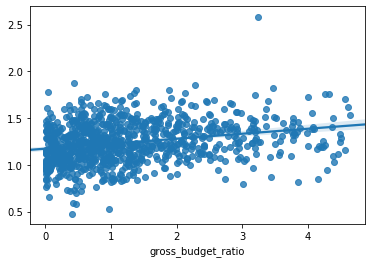

In [34]:
sns.regplot(y_test, y_pred )

### 1.2.1.2) Lasso Regression

In [35]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
Lasso = linear_model.Lasso()
clf2 = GridSearchCV(Lasso, parameters, scoring ='neg_mean_squared_error')
clf2.fit(X_train_scaled, y_train)

y_pred = clf2.predict(X_test_scaled)

print("Lasso best parameters:", clf2.best_params_)
print("Lasso score:", clf2.score(X_test_scaled, y_test))
print("Lasso MSE:", mean_squared_error(y_test, clf2.predict(X_test_scaled)))
print("Lasso best estimator coef:", clf2.best_estimator_.coef_)

Lasso best parameters: {'alpha': 0.1}
Lasso score: -1.1678930038823336
Lasso MSE: 1.1678930038823336
Lasso best estimator coef: [ 0.  0.  0. -0. -0.  0. -0. -0.  0. -0. -0.  0. -0. -0. -0.  0.  0.  0.
  0.  0.  0. -0.]


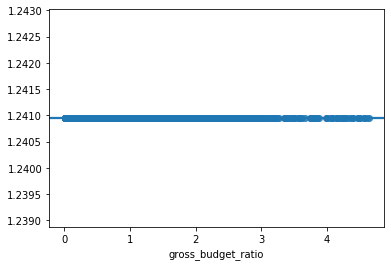

In [36]:
sns.regplot(y_test, y_pred )

### 1.2.1.3) Decision Tree Regressor

In [37]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTR = DecisionTreeRegressor(random_state=10)
clf3 = GridSearchCV(DTR, parameters, scoring ='neg_mean_squared_error')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

print("DTR best parameters:", clf3.best_params_)
print("DTR score:", clf3.score(X_test, y_test))
print("DTR MSE:", mean_squared_error(y_test, clf3.predict(X_test)))

DTR best parameters: {'criterion': 'mse', 'max_depth': 100, 'min_samples_leaf': 0.25, 'min_samples_split': 0.001}
DTR score: -1.1527421087747125
DTR MSE: 1.1527421087747125


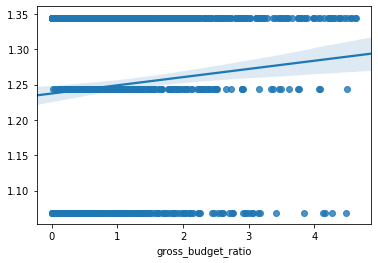

In [38]:
sns.regplot(y_test, y_pred )

### 1.2.1.4) Random Forest Regressor

In [39]:
RFEstimatorList = [25,50,100,200]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFR = RandomForestRegressor(random_state=10)
clf4 = GridSearchCV(RFR, parameters, cv=5, verbose=0,scoring ='neg_mean_squared_error')
clf4.fit(X_train, y_train)

y_pred = clf4.predict(X_test)

print("RFR best parameters:", clf4.best_params_)
print("RFR score:", clf4.score(X_test, y_test))
print("RFR MSE:", mean_squared_error(y_test, clf4.predict(X_test)))

RFR best parameters: {'criterion': 'mse', 'max_depth': 10, 'n_estimators': 200}
RFR score: -1.0647697895423964
RFR MSE: 1.0647697895423964


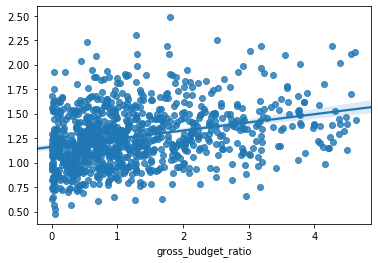

In [40]:
sns.regplot(y_test, y_pred )

## 1.2.2) With taking log and feature elimination

### log

In [41]:
df4 = df3.copy()
df4['budget'] = np.log(df4['budget'])
df4['cast_total_facebook_likes'] = df4['cast_total_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))

### elimination

In [42]:
df4.columns

Index(['duration', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'budget', 'Biography', 'Comedy', 'Crime', 'Drama', 'Romance',
       'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy', 'Family_Animation',
       'Action_Adventure', 'History_War', 'Others', 'director_rank',
       'actor1_rank', 'actor2_rank', 'actor3_rank', 'gross_budget_ratio',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_R'],
      dtype='object')

In [43]:
df4 = df4.drop(columns = ['facenumber_in_poster', 'Biography', 'Crime',
       'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy',
       'History_War'])

In [44]:
X = df4.drop(columns=['gross_budget_ratio'])
y = df4['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2122, 16)
Dimensionality of X_test : (910, 16)
Dimensionality of y_train: (2122,)
Dimensionality of y_test : (910,)


### 1.2.2.1) Ridge Regression

In [45]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [46]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = Ridge()
clf1 = GridSearchCV(ridge, parameters, scoring ='neg_mean_squared_error')
clf1.fit(X_train_scaled, y_train)

y_pred = clf1.predict(X_test_scaled)

print("ridge best parameters:", clf1.best_params_)
print("ridge score:", clf1.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, clf1.predict(X_test_scaled)))
print("ridge best estimator coef:", clf1.best_estimator_.coef_)

ridge best parameters: {'alpha': 1.1}
ridge score: -1.1240035064143705
ridge MSE: 1.1240035064143705
ridge best estimator coef: [ 1.311639    0.79578004 -1.19070713  0.16239326 -0.18766213 -0.02266204
  0.33816121 -0.09653002 -0.09683504  0.70176541 -0.13457132  0.13546421
  0.12769961  0.21607781  0.3214669   0.14807552]


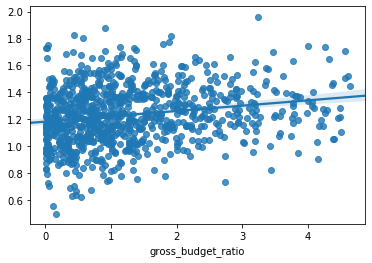

In [47]:
sns.regplot(y_test, y_pred )

### 1.2.2.2) Lasso Regression

In [48]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
Lasso = linear_model.Lasso()
clf2 = GridSearchCV(Lasso, parameters, scoring ='neg_mean_squared_error')
clf2.fit(X_train_scaled, y_train)

y_pred = clf2.predict(X_test_scaled)

print("Lasso best parameters:", clf2.best_params_)
print("Lasso score:", clf2.score(X_test_scaled, y_test))
print("Lasso MSE:", mean_squared_error(y_test, clf2.predict(X_test_scaled)))
print("Lasso best estimator coef:", clf2.best_estimator_.coef_)

Lasso best parameters: {'alpha': 0.1}
Lasso score: -1.1678930038823336
Lasso MSE: 1.1678930038823336
Lasso best estimator coef: [ 0.  0. -0.  0. -0.  0.  0. -0. -0.  0.  0.  0.  0.  0.  0. -0.]


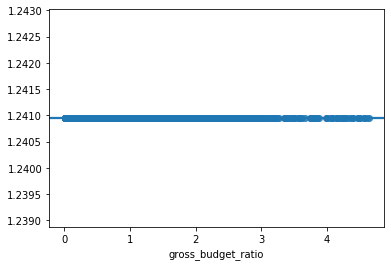

In [49]:
sns.regplot(y_test, y_pred )

### 1.2.2.3) Decision Tree Regressor

In [50]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTR = DecisionTreeRegressor(random_state=10)
clf3 = GridSearchCV(DTR, parameters, scoring ='neg_mean_squared_error')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

print("DTR best parameters:", clf3.best_params_)
print("DTR score:", clf3.score(X_test, y_test))
print("DTR MSE:", mean_squared_error(y_test, clf3.predict(X_test)))

DTR best parameters: {'criterion': 'mse', 'max_depth': 100, 'min_samples_leaf': 0.25, 'min_samples_split': 0.001}
DTR score: -1.1527421087747125
DTR MSE: 1.1527421087747125


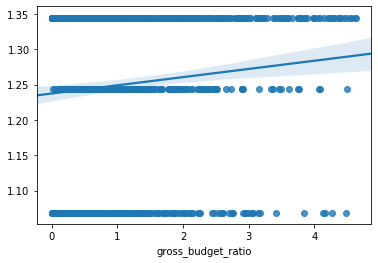

In [51]:
sns.regplot(y_test, y_pred )

### 1.2.2.4) Random Forest Regressor

In [52]:
RFEstimatorList = [25,50,100,200]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFR = RandomForestRegressor(random_state=10)
clf4 = GridSearchCV(RFR, parameters, cv=5, verbose=0,scoring ='neg_mean_squared_error')
clf4.fit(X_train, y_train)

y_pred = clf4.predict(X_test)

print("RFR best parameters:", clf4.best_params_)
print("RFR score:", clf4.score(X_test, y_test))
print("RFR MSE:", mean_squared_error(y_test, clf4.predict(X_test)))

RFR best parameters: {'criterion': 'mse', 'max_depth': 10, 'n_estimators': 200}
RFR score: -1.0735460182038457
RFR MSE: 1.0735460182038457


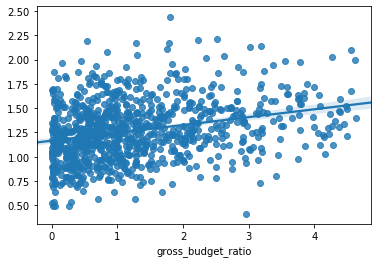

In [53]:
sns.regplot(y_test, y_pred )